# Support Vector Machines

Capable of performing linear or non-linear classification, regression, and even outlier detection. Best suited for classification of small- or medium-sized datasets

## Linear SVM Classification

Fits the widst possible street between the classes (*large margin classification*) <br><br>
SVMs are sentitive to the feature scales, make sure to scale data

### Soft Margin Classification

If we impose that all instances must be off the street and on the right side, this is called *hard margin classification*. Two main issues with this: first it only works on data that is *linearly separable*, second, it is sensitive to outliers. <br> <br>
To avoid this, use a more flexible model. Find a good balance between keeping the street as large as possible and limiting the *margin violations* (ie the instances that end up in the middle or wrong side of the street). This is called *soft margin classification*. <br> <br>
In Scikit-Learn, specify hyperparamter `C`. If it is set to a low value, it will widen the street. A higher value will narrow the street. If the SVM is overfitting, regularize by reducing `C`.

Example using Scikit-Learn and iris dataset

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris["data"][:, (2,3)] # petal length, petal width
y = (iris["target"] == 2).astype(np.float64) # Iris virginica

svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge"))
])

svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [2]:
>>> svm_clf.predict([[5.5, 1.7]])

array([1.])

Unlike Logistic Regression classifiers, SVM classifiers do not output probabilites for each class <br><br>
Instead of using `LinearSVC` class, we could use the SVC class with a linear kernel - `SVC(kernel="linear", C=1)`. Or we could use `SGDClassifier` class, with `SGDClassifier(loss="hinge", alpha=1/(m*C))`. This applies Stochastic Gradient Descent to train a linear SVM classifier. Does not converge as fast as `LinearSVC` but can be useful to handle online classification tasks or huge datasets that do not fit in memory. <br><br>
`LinearSVC` regularizes bias term, so center the training set first by subtracting its mean. This is automatic if you scale the data using `StandardScaler`. Make sure to set `loss` hyperparameter to `"hinge"`. For better performance, set the `dual` hyperparameter to `False` unless there are more features than training instances.

## Nonlinear SVM Classification

Many datasets are not linearly separable. One approach to handling these datasets is to add more features, such as polynomial features. This can sometimes result in the higher dimension dataset being linearly separable. 

Example using moons dataset

In [3]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

X, y = make_moons(n_samples=100, noise=0.15)
polynomial_svm_clf = Pipeline([
    ('poly_features', PolynomialFeatures(degree=3)),
    ('scaler', StandardScaler()),
    ('svm_clf', LinearSVC(C=10, loss='hinge'))
])

polynomial_svm_clf.fit(X, y)

/Users/arturo/opt/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge'))])

### Polynomial Kernel

Adding polynomial features is implement and useful for many ML algorithms (not just SVMs). But low degree polynomial cannot deal with complex datasets, and high degree makes the models too slow. <br><br>
When using SVMs apply *kernel trick*. Makes it possible to get the same result as if you had added many polynomial features, even with very high-degree polynomials, without actually having to add them. Implemented by the `SVC` class

In [4]:
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='poly', degree=3, coef0=1, C=5))
])

poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

If model is overfitting, try reducing the polynomial degree. If it is underfitting, try increasing it. Hyperparameter `coef0` controls how much the model is influenced by high-degree polynomials vs low-degree polynomials

### Similarity Features

Another way to tackle nonlinear problems. *similarity function*: measures how much each instance resembles a particular *landmark*. Set the landmarks and use similarity function, like Gaussian *Radial Basis Function* (RBF), to transform into linearly separable dataset. Select landmarks at location of every instance in the dataset. Doing. this creates many dimensions and thus increases the chances that the transformed training set will be linearly separable. Downside is, you may end up with large number of features. 

### Gaussian RBF Kernel

Similarity features can be useful with any ML algorithm, but may be computationally expensive to compute all the additional features. Again, kernel trick can be used on SVM to obtain similar results. 

In [5]:
rbf_kernel_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='rbf', gamma=5, C=0.001))
])

rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

Increasing `gamma` makes the bell-shaped curve narrow. As a result, each instance's range of influence is smaller: the decision boundary ends up being more irregular, wiggling around individual instances. Decreasing `gamma` makes the bell-shaped curve wider: instances have a larger range of influence and the decision boundary ends up smoother. $\gamma$ acts like a regularization hyperparmeter: if model is overfitting, reduce it; if underfitting, increase it (similar to `C` hyperparameter).

### Computational Complexity

| Class | Time complexity | Out-of-core support | Scaling required | Kernel trick |
| :-: | :-: | :-: | :-: | :-: |
| Linear SVC | $O(mn)$ | No | Yes | No |
| SGDClassifier | $O(mn)$ | Yes | Yes | No |
| SVC | $O(m^{2}n)$ to $O(m^{3}n)$ | No | Yes | Yes |

## SVM Regression

Reverse the objective with classification: instead of trying to fit the largest possible street between two classes while limiting margin violatioins, SVM regression tries to fit as many instances as possible *on* the street while limiting margin violations (ie instances *off* the street). Width of the street is controlled by hyperparameter $\epsilon$. If adding more training instances within the margin does not affect the model's predictions the model is said to be $\epsilon$ *-insensitive* <br><br>
Use `LinearSVR` class to perform linear SVM Regression in Scikit-Learn.

In [6]:
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=1.5)
svm_reg.fit(X, y)

LinearSVR(epsilon=1.5)

For nonlinear regression tasks, use kernelized SVM model

In [7]:
from sklearn.svm import SVR

svm_poly_reg = SVR(kernel='poly', degree=2, C=100, epsilon=0.1)
svm_poly_reg.fit(X, y)

SVR(C=100, degree=2, kernel='poly')

`LinearSVR` class scales linearly with the size of the training set (like `LinearSVC`), while `SVR` class gets much too slow when the training set grows large (like `SVC` class). 

# Exercises

1. What is the fundemental idea behind Support Vector Machines?
<br><br>
For linearly separable data, the data can be classified using a line or plane with the widest possible margin. 
<br><br>
*On nonlinear data, utilize kernels.*

2. What is a support vector?
<br><br>
An instance that lies on the edge of the margin found by the SVM. 
<br><br>
*Instances that lie on the street. Any instance that is not a support vector has no influence whatsoever; they won't affect the decision boundary.*

3. Why is it important to scale the inputs when using SVMs?
<br><br>
SVMs are sensitive to their feature weights, so scaling them will reduce error
<br><br>
*SVMs try to fit the largest possible "street" between the classes so if the training set is not scaled, the SVM will neglect small features.*

4. Can an SVM classifier output a confidence score when it classifies an instance? What about a probability?
<br><br>
Unlike regressions, an SVM will only output the class the algorithm thinks the instance belongs in. So no confidence score or probability
<br><br>
*SVMs can output the distance between the test instance and the decision boundary; this can be used as a confidence score. However, the score cannot be directly converted into an estimation of the class probability. Setting `probability=True` when creating an SVM in Scikit-Learn, then training it will cailbrate the probabilities using Logistic Regression on the SVM's scores.*

5. Should you use the primal or the dual form of the SVM problem to train a model on a training set with millions of instances and hundres of features?
<br><br>
Primal; the dual is faster in cases where there are fewer instances in the training set than the number of features
<br><br>
*Only applies to linear SVMs since kernelized SVMs can only use dual form. Primal form scales linearly with added features, while dual form scales quadratically or cubically with added features (much slower).*

6. Say you've trained an SVM classifier with an RBF kernel, but it seems to underfit the training set. Should you increase or decrease gamma? What about C?
<br><br>
Increase gamma and/or C

7. How should you set the QP parameters (H, f, A, and b) to solve the soft margin linear SVM classifier using an off-the-shelf QP solver?
<br><br>
?
<br><br>
*Idk how to even answer this one lol*

8. Train a `LinearSVC` on a linearly separable dataset. Then train an `SVC` and a `SGDClassifier` on the same dataset. See if you can get them to produce roughly the same model.

Generate dataset using `sklearn.datasets.make_blobs()`

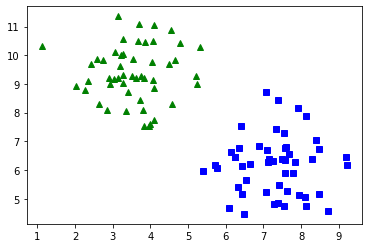

In [4]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=100, centers=2, n_features=2, center_box=(0, 10), random_state=42)
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'g^')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')
plt.show()

In [17]:
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

C = 1
alpha = 1/(C*len(X))

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lin_svc = LinearSVC(C=C, loss='hinge', random_state=42)
svc = SVC(kernel='linear', C=1)
sgd = SGDClassifier(loss='hinge', alpha=alpha, random_state=42)

lin_svc.fit(X_scaled, y)
svc.fit(X_scaled, y)
sgd.fit(X_scaled, y)

print('LinearSVC:                  ', lin_svc.intercept_, lin_svc.coef_)
print('SVC:                        ', svc.intercept_, svc.coef_)
print("SGDClassifier(alpha={:.4f}):".format(sgd.alpha), sgd.intercept_, sgd.coef_)

LinearSVC:                   [0.00764259] [[ 1.75763463 -1.03670441]]
SVC:                         [0.00797117] [[ 1.75946971 -1.03658655]]
SGDClassifier(alpha=0.0100): [-0.0268809] [[ 1.751708 -1.018629]]


Plot the decision boundaries

[]

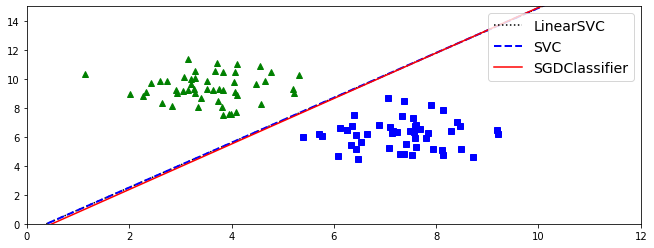

In [24]:
# Compute the slope and bias of each decision boundary
w1 = -lin_svc.coef_[0, 0]/lin_svc.coef_[0, 1]
b1 = -lin_svc.intercept_[0]/lin_svc.coef_[0, 1]
w2 = -svc.coef_[0, 0]/svc.coef_[0, 1]
b2 = -svc.intercept_[0]/svc.coef_[0, 1]
w3 = -sgd.coef_[0, 0]/sgd.coef_[0, 1]
b3 = -sgd.intercept_[0]/sgd.coef_[0, 1]

# Transform the decision boundary lines back to the original scale
line1 = scaler.inverse_transform([[-10, -10 * w1 + b1], [10, 10 * w1 + b1]])
line2 = scaler.inverse_transform([[-10, -10 * w2 + b2], [10, 10 * w2 + b2]])
line3 = scaler.inverse_transform([[-10, -10 * w3 + b3], [10, 10 * w3 + b3]])

# Plot all three decision boundaries
plt.figure(figsize=(11, 4))
plt.plot(line1[:, 0], line1[:, 1], "k:", label="LinearSVC")
plt.plot(line2[:, 0], line2[:, 1], "b--", linewidth=2, label="SVC")
plt.plot(line3[:, 0], line3[:, 1], "r-", label="SGDClassifier")

plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'g^')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')
plt.legend(loc='upper right', fontsize=14)
plt.axis([0, 12, 0, 15])
plt.plot()

9. Train an SVM classifier on the MNIST dataset. Since SVM classifiers are binary classifiers, you will need to use one-versus-the-rest to classify all 10 digits. You may want to tune the hyperparameters using small validation sets to speed up the process. What accuracy can you reach?

Get dataset

In [28]:
from sklearn.datasets import load_digits

mnist = load_digits()
X, y = mnist['data'], mnist['target']

Train test split

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Train model and check accuracy

In [30]:
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

mnist_svc = Pipeline([
    ('scaler', StandardScaler()), 
    ('model', SVC(kernel='rbf', C=1))
])


mnist_svc.fit(X_train, y_train)
y_pred = mnist_svc.predict(X_train)
accuracy_score(y_pred, y_train)

0.9972164231036882

Use grid search to find better parameter values for kernel, gamma, and C

In [31]:
kernel = ['linear', 'rbf']
gamma = [x/100 for x in range(1, 10)]
C = [x/10 for x in range(1,51,2)]

param_grid = {
    'model__kernel': kernel,
    'model__gamma': gamma,
    'model__C': C
}

In [32]:
from sklearn.model_selection import GridSearchCV

svc_grid = GridSearchCV(mnist_svc, param_grid, cv=5)
svc_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVC(C=1))]),
             param_grid={'model__C': [0.1, 0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5,
                                      1.7, 1.9, 2.1, 2.3, 2.5, 2.7, 2.9, 3.1,
                                      3.3, 3.5, 3.7, 3.9, 4.1, 4.3, 4.5, 4.7,
                                      4.9],
                         'model__gamma': [0.01, 0.02, 0.03, 0.04, 0.05, 0.06,
                                          0.07, 0.08, 0.09],
                         'model__kernel': ['linear', 'rbf']})

In [33]:
svc_grid.best_params_

{'model__C': 1.7, 'model__gamma': 0.03, 'model__kernel': 'rbf'}

In [34]:
best_grid = svc_grid.best_estimator_

In [36]:
grid_predict = best_grid.predict(X_train)
accuracy_score(grid_predict, y_train)

1.0

In [37]:
grid_predict = best_grid.predict(X_test)
accuracy_score(grid_predict, y_test)

0.9777777777777777

10. Train an SVM regressor on the California housing dataset.

Get data

In [55]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

housing = fetch_california_housing()
X, y = housing['data'], housing['target']

Create test and training set

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Preprocessing

In [57]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Fit data to regressor

In [58]:
from sklearn.svm import SVR

svr = SVR()

svr.fit(X_train, y_train)

SVR()

In [59]:
from sklearn.metrics import mean_squared_error

y_pred = svr.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
mse

1.3685019409034642

Use randomized search to find best parameters for C and gamma

In [60]:
from scipy.stats import reciprocal, uniform

param_grid = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

svr_grid = RandomizedSearchCV(svr, param_grid, n_iter=10, cv=3, random_state=42)
svr_grid.fit(X_train, y_train)

In [ ]:
best_grid = svr_grid.best_estimator_
grid_predict = best_grid.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
mse

In [ ]:
grid_predict = best_grid.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mse